# This dataset consists of features that are associated with car specifications. There are 9 different categories (MPG, Cylinders, Displacement, Horsepower, Weight, Acceleration, Model Year, Origin, Car Name). I have decided to create a model that can predict MPG as a test to see if we can build a model that can optimize for fuel efficiency.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from sklearn import linear_model, preprocessing

In [2]:
% matplotlib inline

In [3]:
# load dataset
data = pd.read_csv("data/auto-mpg.data-original", delim_whitespace = True, header = None)
# Add column headings
data.columns = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

In [4]:
# Sample the data
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### This dataset focuses on fuel consumption of different types of vehicles. The first column is the MPG (miles per gallon) and will be our Y variable. All remaining columns will be our training data, X. We will fit our training data via a linear regression model. We will also convert the Car Name labels into integer values because we can't operate on string values. We can use the LabelEncoder() method from sklearn to convert the string labels.

In [5]:
# Converting labels to integer values
le = preprocessing.LabelEncoder()
labels = data.iloc[:, 8]
le.fit(labels)
data.iloc[:, 8] = le.transform(labels)
data.head()
data.iloc[:,:]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,50
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,37
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,235
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,14
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,164
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,143
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,55
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,227
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,246
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,1


In [7]:
# get shape of data
number_of_nan = sum(pd.isnull(data).sum()) # get number of nan values
print("The Shape of the data: {} x {}".format(data.shape[0], data.shape[1]))
print("Number of NaN values: {}".format(number_of_nan))

The Shape of the data: 406 x 9
Number of NaN values: 14


In [8]:
# Find where the NaN values are
pd.isnull(data).sum()

MPG             8
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
Car Name        0
dtype: int64

In [9]:
# Pull rows that have NaN values
data[data.isnull().any(axis=1)]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,77
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,49
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,165
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,236
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,15
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,154
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,159
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,299
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,152
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,262


### There are 14 rows in the data that have NaN values. Rather than simply removing these data altogether, I have decided to replace these NaN values with median values in the MPG and Horsepower categories.

In [10]:
data = data.fillna(data["MPG"].median())
data = data.fillna(data["Horsepower"].median())
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
Car Name        0
dtype: int64

### There seems to be a large variety of car names so I will check to see how many car names exist and decide to drop it from our model if the variation is too high. If there are more than 50 then I will exclude to test.

In [11]:
num_of_car_names = data["Car Name"].unique().shape[0]
print("There are {} different types of cars".format(num_of_car_names))

There are 312 different types of cars


In [12]:
# Remove NaN values and analyze
# data_dropna = data.dropna()
# X = data_dropna.iloc[:, 1:9] 
# Y = data_dropna.iloc[:, 0] 
# print("The Shape of the data when NaN is removed: {} x {}".format(data_dropna.shape[0], data_dropna.shape[1]))

X = data.iloc[:,1:8] # Last row is text of vehicle type and is omitted
Y = data.iloc[:,0] # First row is MPG

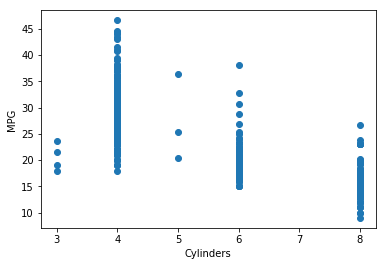

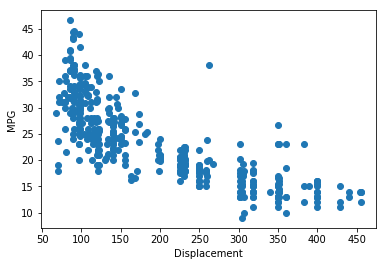

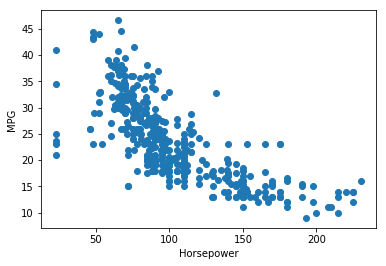

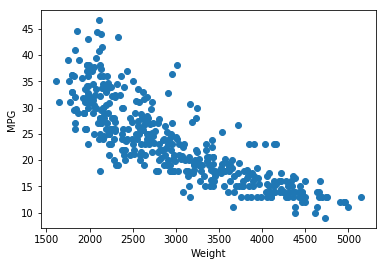

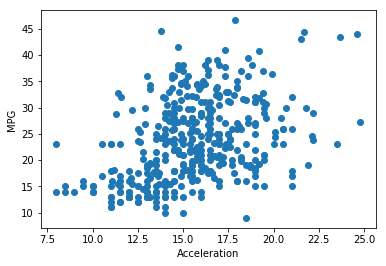

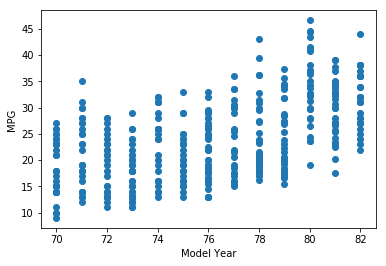

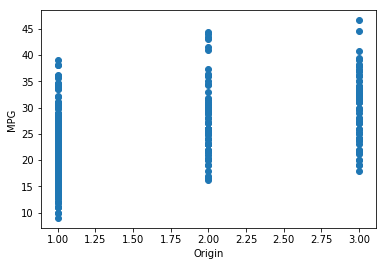

In [13]:
features = data.columns[1:-1]
for i in range(0,len(features)):
    plt.scatter(data[features[i]], data["MPG"])
    plt.xlabel(features[i])
    plt.ylabel("MPG")
    plt.show()

### I have decided to look at a cross correlation matrix to see similarity between the different features of our data

In [ ]:
# Create the cross correlation matrix
corr = X.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
# Adjust Figure Size
plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask = mask)

### Based on the cross correlation matrix, we can see some features that correlate quite strongly together. For instance, we can see that a measure of a vehicles displacement is strongly correlated with the number of cylinders the vehicle has or the weight of the vehicle shows correlation with horsepower. I have not explored this further but could in later iterations of the model.
### For now, I've simply used all of the features excluding car names.

In [ ]:
linreg_model = linear_model.LinearRegression()
linreg_model.fit(X,Y)

In [ ]:
R2 = linreg_model.score(X,Y)
print("The Rsquared score using {} training samples is: {}".format(data.shape[0], R2))

In [ ]:
# random.seed(2)
indices = random.sample(range(0, 406), 10)
print("Random sample indexes chosen to evaluate predictions: {}".format(indices))

In [ ]:
Yhat_samples = linreg_model.predict(X.iloc[indices, :])
Y_samples = list(Y.iloc[indices])
print("Predictions based on our model: {}".format(Yhat_samples))
print("Actuals: {}".format(Y_samples))

In [ ]:
params = linreg_model.get_params

In [ ]:
plt.scatter(X.iloc[:,0], Y)
plt.xlabel("Number of cylinders")
plt.ylabel("MPG")
plt.show()

In [ ]:
plt.scatter(X.iloc[:,1], Y)
plt.xlabel("Displacement")
plt.ylabel("MPG")
plt.show()

In [ ]:
plt.scatter(X.iloc[:,2], Y)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()

In [ ]:
plt.scatter(X.iloc[:,3], Y)
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()

In [ ]:
plt.scatter(X.iloc[:,4], Y)
plt.xlabel("Acceleration")
plt.ylabel("MPG")
plt.show()

In [ ]:
plt.scatter(X.iloc[:,5], Y)
plt.xlabel("Model Year")
plt.ylabel("MPG")
plt.show()

In [ ]:
plt.scatter(X.iloc[:,6], Y)
plt.xlabel("Origin")
plt.ylabel("MPG")
plt.show()

In [ ]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
for cn in column_names:
    data[cn] = data[cn].fillna(np.median(data_dropna[cn]))
    
print("Finished converting Na values to Median values")

number_of_nan = pd.isnull(data).sum().sum() # get number of nan values
print("The number of Na values remaining in the data dataframe is: {}".format(number_of_nan))

In [ ]:
X = data.iloc[:, 1:9]
Y = data.iloc[:, 0]

In [ ]:
linreg_model.fit(X, Y)
R2_full = linreg_model.score(X, Y)
print("The Rsquared score using 405 training samples is: {}".format(R2_full))

#### We can also calculate the R2 values using different features

In [ ]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
for i in range(len(column_names)):
    X = data.iloc[:, i:i+1]
    linreg_model.fit(X, Y)
    R2 = linreg_model.score(X, Y)
    print("The Rsquared score between " + column_names[i] + " and mpg is: {}".format(R2))